In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import plotly.express as px

In [2]:
sns.set_style('darkgrid')

In [3]:
apartments = pd.read_csv('../../data/processed/apartments.csv')
chapinero =  apartments[(apartments['tipo_operacion'] == 'VENTA') & (apartments['localidad'] == 'CHAPINERO')]
chapinero = chapinero.drop(columns=['precio_arriendo'])
chapinero.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,cerca_estacion_tm
6,3390-M4320821,APARTAMENTO,VENTA,3.900000e+09,432.00,4.0,5.0,3000000.0,4.0,CHICO,...,0,0,1,1,False,CHAPINERO,S.C. EL NOGAL,Héroes,960.91,0
17,897-M4156030,APARTAMENTO,VENTA,3.900000e+08,40.00,1.0,2.0,NaN,1.0,CHAPINERO ALTO,...,0,0,1,0,False,CHAPINERO,S.C. CHAPINERO CENTRAL,Calle 57,242.21,1
18,11301-1492,APARTAMENTO,VENTA,2.100000e+09,350.00,3.0,4.0,2040000.0,3.0,OTROS,...,0,1,1,0,False,CHAPINERO,CHICO ORIENTAL,Calle 85,2151.16,0
19,11013-M4424136,APARTAMENTO,VENTA,8.450000e+08,138.96,3.0,4.0,1170000.0,2.0,CHICO,...,0,0,1,0,False,CHAPINERO,S.C. CHICO NORTE,Virrey,1115.25,0
20,293-M3798297,APARTAMENTO,VENTA,1.700000e+09,178.00,3.0,4.0,1128000.0,3.0,CHAPINERO ALTO,...,0,1,1,0,False,CHAPINERO,ZAMUDIO,Flores,1138.96,0


In [4]:
chapinero.shape

(4112, 30)

In [5]:
chapinero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4112 entries, 6 to 25254
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codigo                   4112 non-null   object 
 1   tipo_propiedad           4112 non-null   object 
 2   tipo_operacion           4112 non-null   object 
 3   precio_venta             4112 non-null   float64
 4   area                     4112 non-null   float64
 5   habitaciones             4112 non-null   float64
 6   banos                    4112 non-null   float64
 7   administracion           3708 non-null   float64
 8   parqueaderos             4112 non-null   float64
 9   sector                   3946 non-null   object 
 10  estrato                  4110 non-null   float64
 11  antiguedad               4112 non-null   object 
 12  estado                   4112 non-null   object 
 13  longitud                 4112 non-null   float64
 14  latitud                  411

In [6]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'cerca_estacion_tm'],
      dtype='object')

In [80]:
def format_tick_humanize(value, tick_number):
    return humanize.intword(value)

# Eliminar outliers

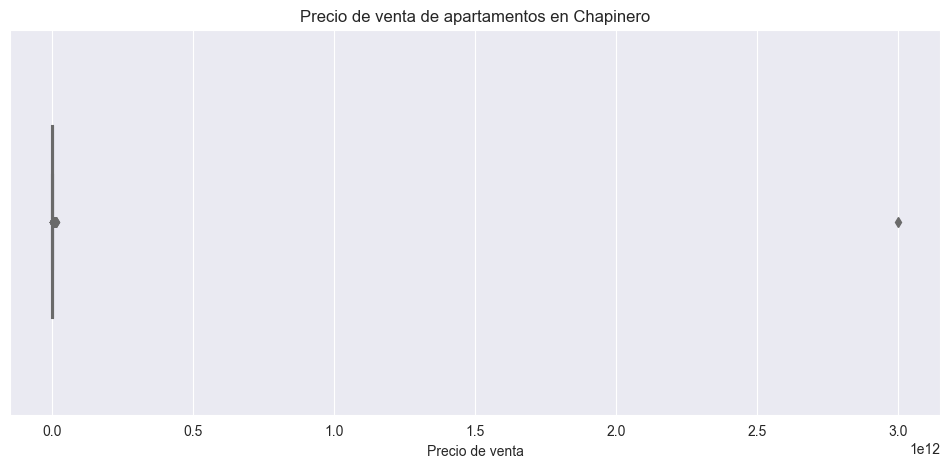

In [7]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.5,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

In [8]:
Q1 = chapinero['precio_venta'].quantile(0.25)
Q3 = chapinero['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['precio_venta'] < lower) | (chapinero['precio_venta'] > upper)]
outliers.shape

(194, 30)

In [9]:
chapinero = chapinero[(chapinero['precio_venta'] > lower) & (chapinero['precio_venta'] < upper)]
chapinero.shape

(3918, 30)

# Analisis Univariado

## Area (m2)

### Eliminar outliers

In [10]:
# eliminar area igual a 0

chapinero = chapinero[chapinero['area'] > 0]

In [11]:
Q1 = chapinero['area'].quantile(0.25)
Q3 = chapinero['area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['area'] < lower) | (chapinero['area'] > upper)]
outliers.shape

(55, 30)

In [12]:
chapinero = chapinero[(chapinero['area'] > lower) & (chapinero['area'] < upper)]
chapinero.shape

(3848, 30)

### Analisis

In [13]:
chapinero.area.describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
area,"3,848.0",170.77513253638253,86.65695016193406,12.0,101.0,161.0,230.0,430.0


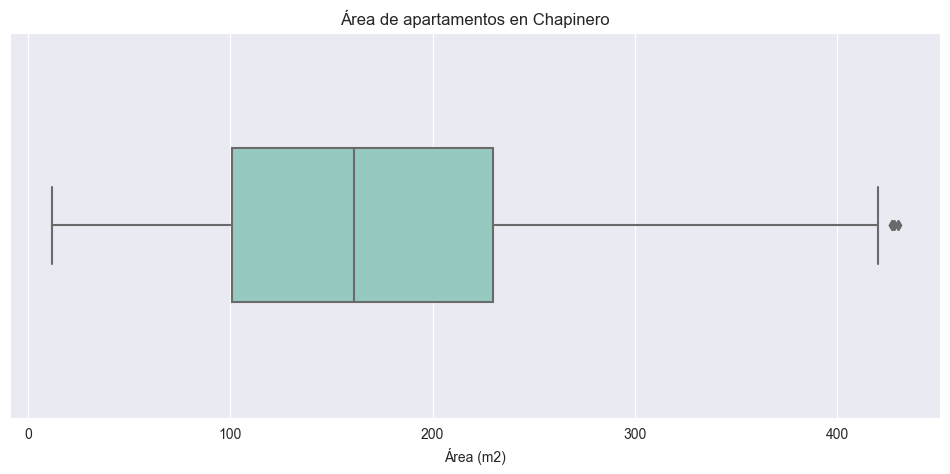

In [14]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='area',
    width=.4,
    palette='Set3',
)

plt.title('Área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

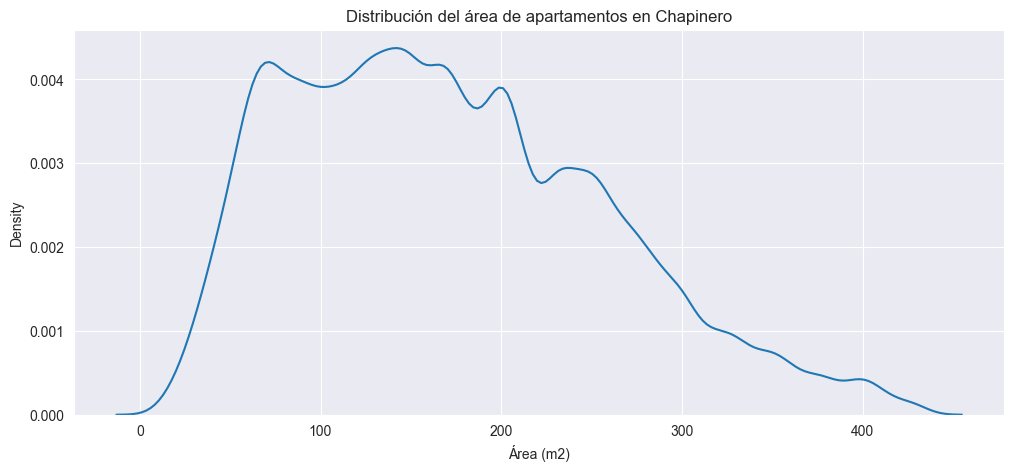

In [15]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
)

plt.title('Distribución del área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Cercania a Transmilenio

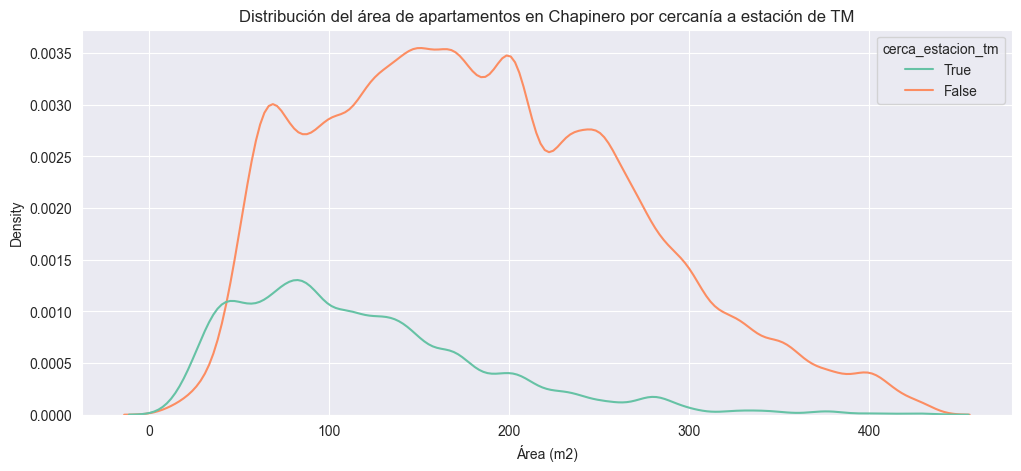

In [16]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

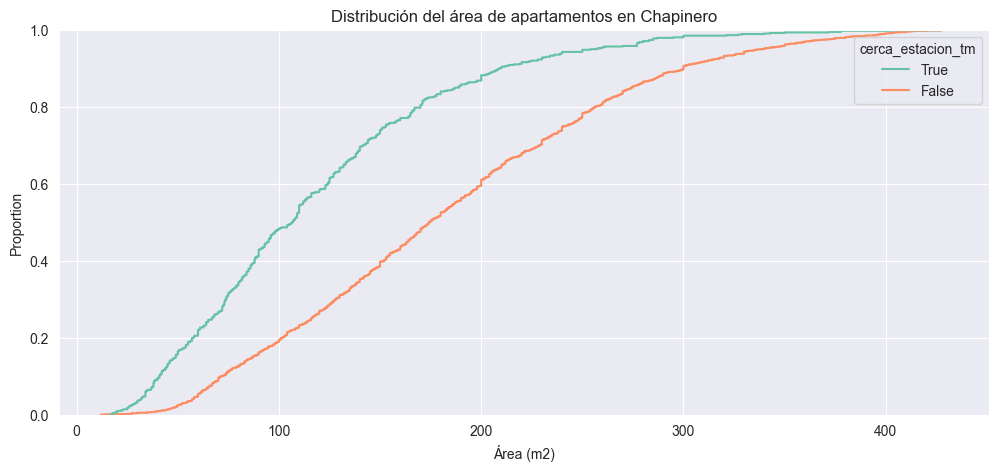

In [17]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()


### Estrato

In [18]:
chapinero.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,4.0,135.8,35.0,104.0,107.8,131.5,159.5,176.0
1.0,2.0,133.8,0.6,133.4,133.6,133.8,134.0,134.2
2.0,5.0,47.0,17.5,30.0,39.0,43.0,47.0,76.2
3.0,91.0,63.7,51.2,17.4,34.0,46.0,73.0,280.0
4.0,338.0,89.5,55.6,12.0,54.0,74.0,110.0,343.0
5.0,416.0,127.4,66.1,30.0,81.9,113.0,164.9,420.0
6.0,2990.0,189.5,83.0,18.8,126.5,182.0,247.8,430.0


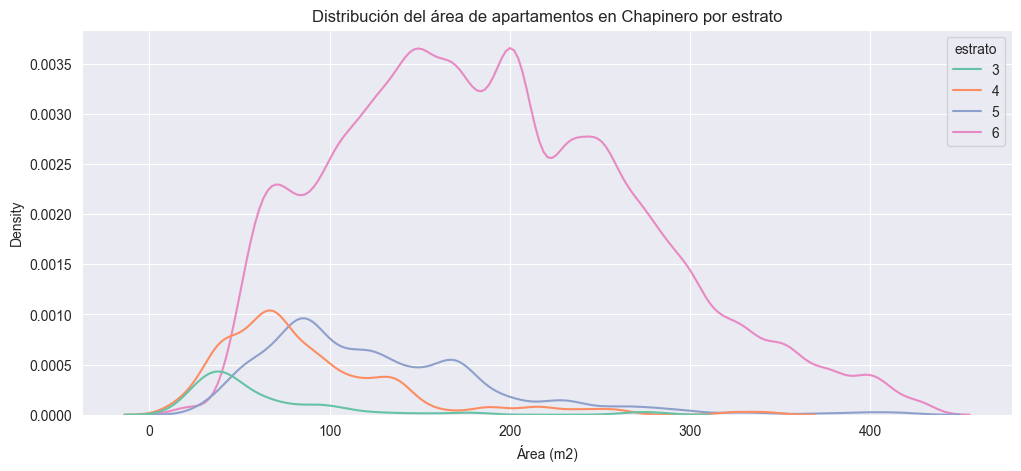

In [19]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por estrato')
plt.xlabel('Área (m2)')
plt.show()

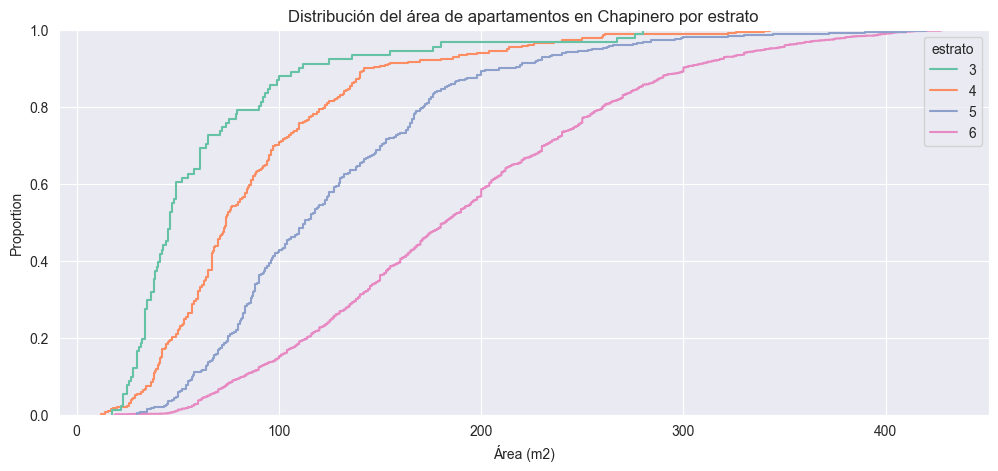

In [20]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='estrato',
    palette='Set2',
    hue_order=[3, 4, 5, 6],
)

plt.title('Distribución del área de apartamentos en Chapinero por estrato')
plt.xlabel('Área (m2)')
plt.show()

### Antiguedad

In [21]:
chapinero.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,632.0,140.9,83.8,12.0,70.0,128.0,197.2,404.0
ENTRE 10 Y 20 ANOS,845.0,173.2,87.6,21.7,104.0,161.0,233.0,417.0
ENTRE 5 Y 10 ANOS,624.0,151.7,83.2,26.0,79.9,139.5,204.0,412.0
MAS DE 20 ANOS,1589.0,186.7,84.6,27.0,119.8,177.0,242.0,430.0
REMODELADO,158.0,192.8,80.9,28.0,138.0,195.2,248.0,410.0


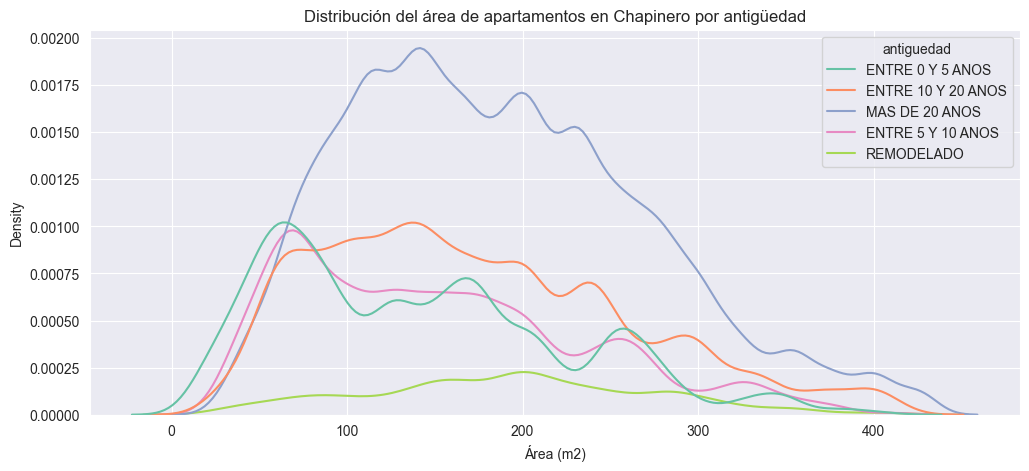

In [22]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

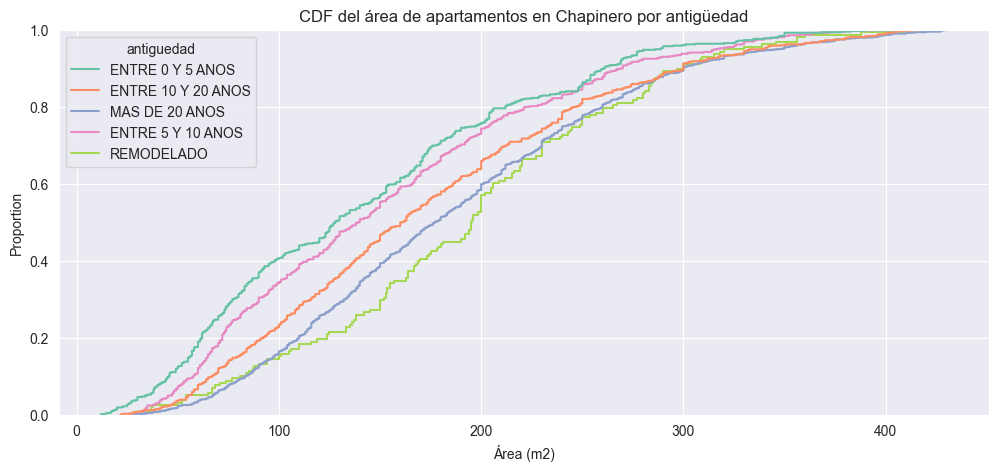

In [23]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF del área de apartamentos en Chapinero por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

### Estacion de TM Cercana

In [120]:
estacion_tm_cercana = chapinero[chapinero['cerca_estacion_tm'] == True]
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)
estacion_tm_cercana_stats

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Virrey,160.0,150.4,73.3,17.0,89.8,139.0,204.0,350.0
Héroes,12.0,148.6,92.3,49.0,105.5,119.5,148.5,403.0
Calle 72,11.0,142.4,81.3,42.8,72.2,125.0,194.6,260.0
Calle 100,179.0,133.1,73.2,18.8,77.5,123.0,164.5,427.0
Flores,18.0,118.9,62.9,28.0,78.2,110.9,136.0,261.0
Calle 85,147.0,116.6,45.0,44.5,83.0,104.0,151.0,280.0
Calle 76,18.0,114.0,58.6,50.0,85.0,110.0,123.8,321.2
Calle 45,26.0,87.8,43.7,29.0,48.2,94.0,114.6,193.0
AV. 39,8.0,73.4,40.1,32.0,48.9,53.8,97.1,134.2


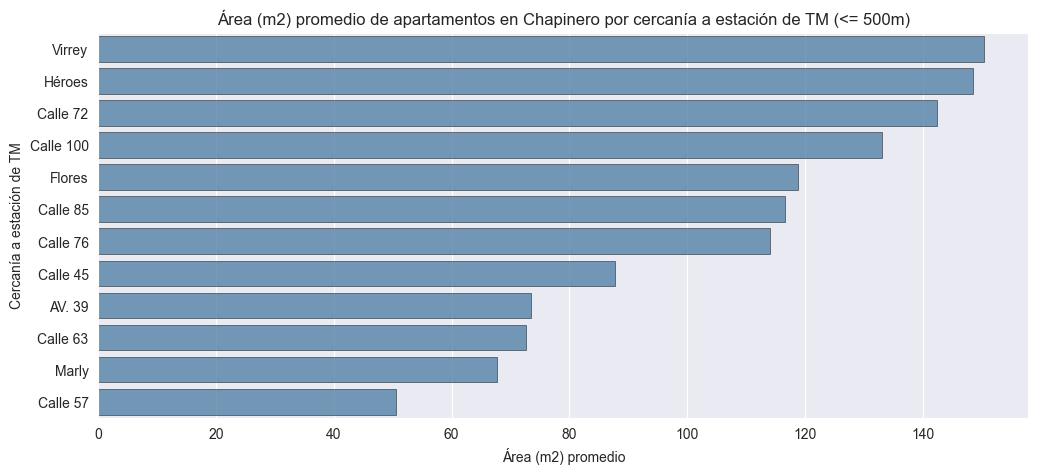

In [121]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Área (m2) promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) promedio')
plt.ylabel('Cercanía a estación de TM')
plt.show()

<Figure size 1200x500 with 0 Axes>

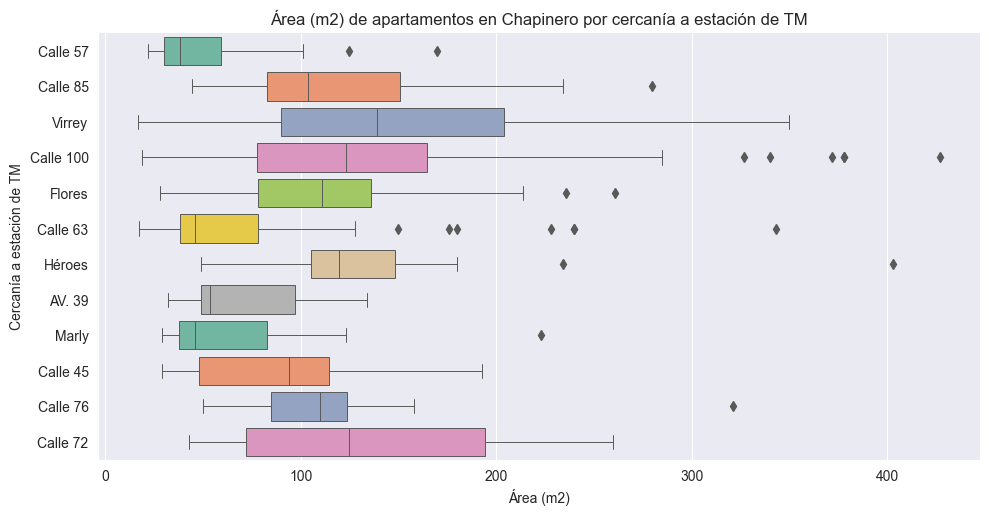

In [50]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='area',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Área (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.ylabel('Cercanía a estación de TM')
plt.show()

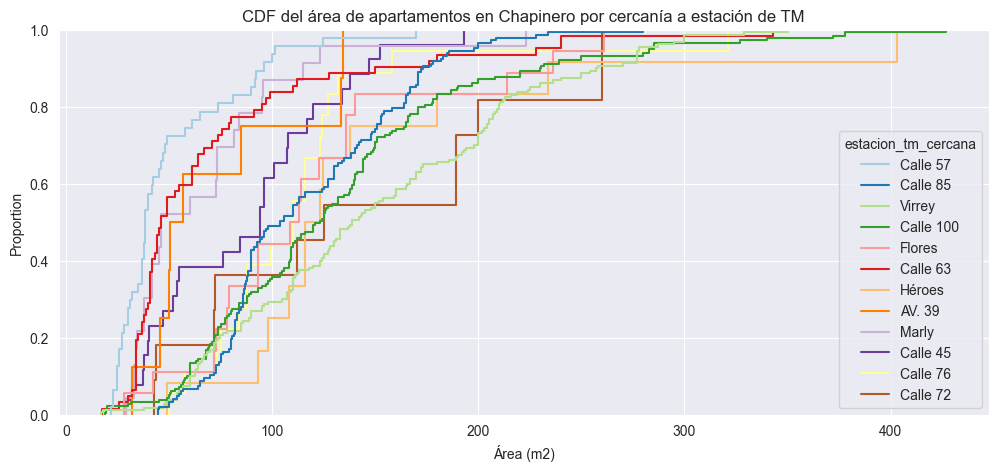

In [63]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    data=estacion_tm_cercana,
    x='area',
    hue='estacion_tm_cercana',
    palette='Paired',
)

plt.title('CDF del área de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

## Precio de venta

In [75]:
chapinero.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,3.8 thousand,1.5 billion,902.0 million,700.0 thousand,740.0 million,1.3 billion,1.9 billion,4.2 billion


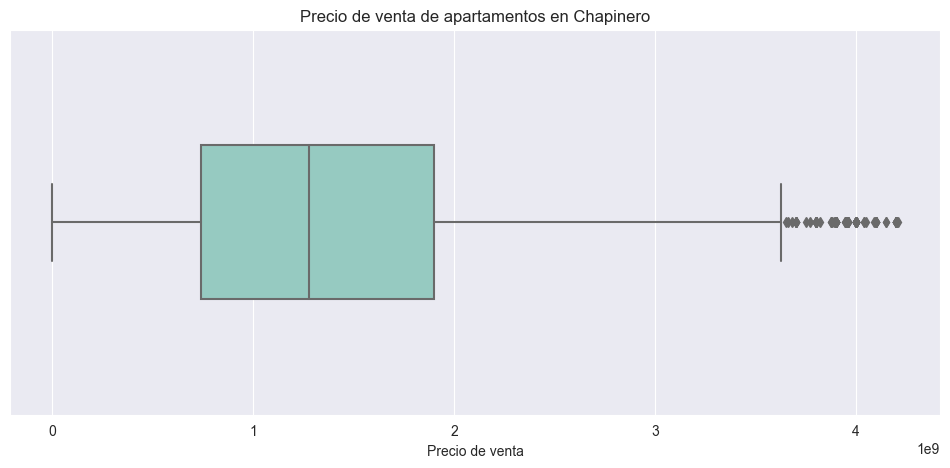

In [76]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.4,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

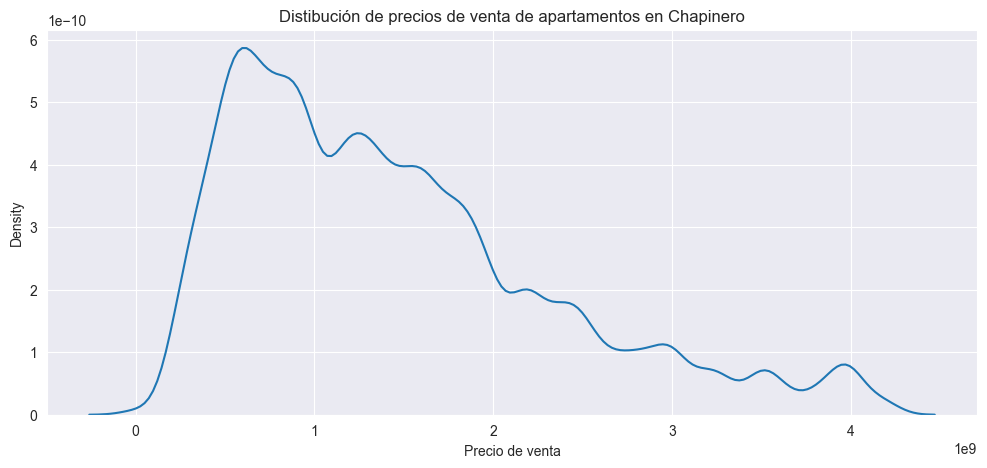

In [77]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

### Barrios

In [78]:
top_barrios = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
).sort_values('mean', ascending=False)

# escoger los que tienen más de 20 registros para que sea más representativo
top_barrios = top_barrios[top_barrios['count'] > 20].head(10)
top_barrios.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
LA CABRERA,183,2.2 billion,2.1 billion,920.9 million
CHICO ORIENTAL,73,2.2 billion,2.0 billion,842.5 million
S.C. EL RETIRO,68,2.1 billion,2.1 billion,971.3 million
CHICO ALTO,65,2.0 billion,1.8 billion,789.6 million
BOSQUE EL RETIRO I SECTOR,94,2.0 billion,1.8 billion,910.2 million
S.C. EL CHICO,352,1.8 billion,1.6 billion,972.8 million
LOS ROSALES,319,1.8 billion,1.6 billion,852.4 million
S.C. BELLAVISTA,279,1.7 billion,1.6 billion,810.7 million
S.C. LAS ACACIAS,125,1.6 billion,1.4 billion,888.6 million


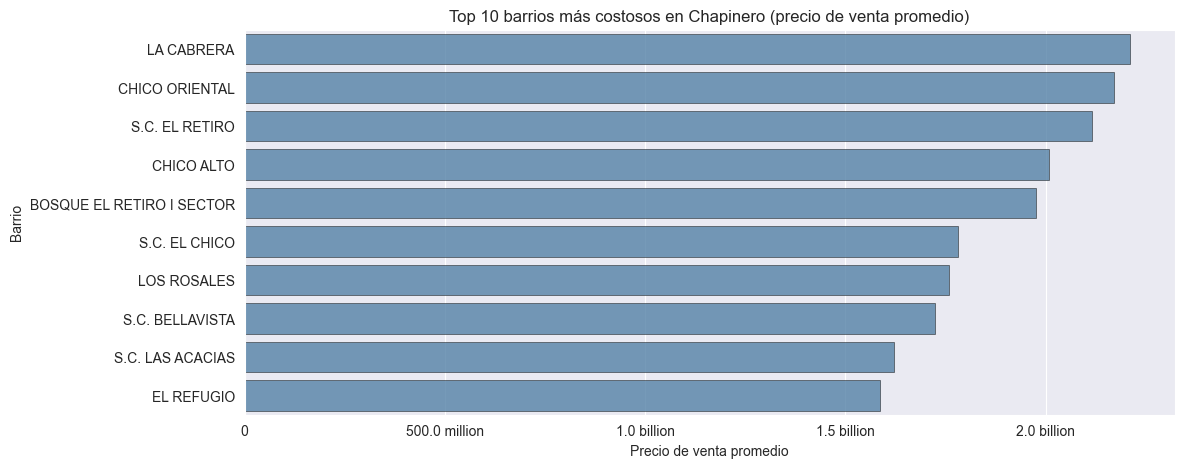

In [103]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios,
    y=top_barrios.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()


### Cercania a Transmilenio

In [49]:
chapinero.groupby('cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))

,count,mean,std,min,25%,50%,75%,max
cerca_estacion_tm,,,,,,,,
0,"3,137.0","1,570,773,150.9917119","904,966,580.7359298","700,000.0","850,000,000.0","1,400,000,000.0","2,070,000,000.0","4,208,500,000.0"
1,711.0,"922,880,733.1082982","669,747,052.9344164","2,100,000.0","475,000,000.0","710,000,000.0","1,190,000,000.0","4,000,000,000.0"


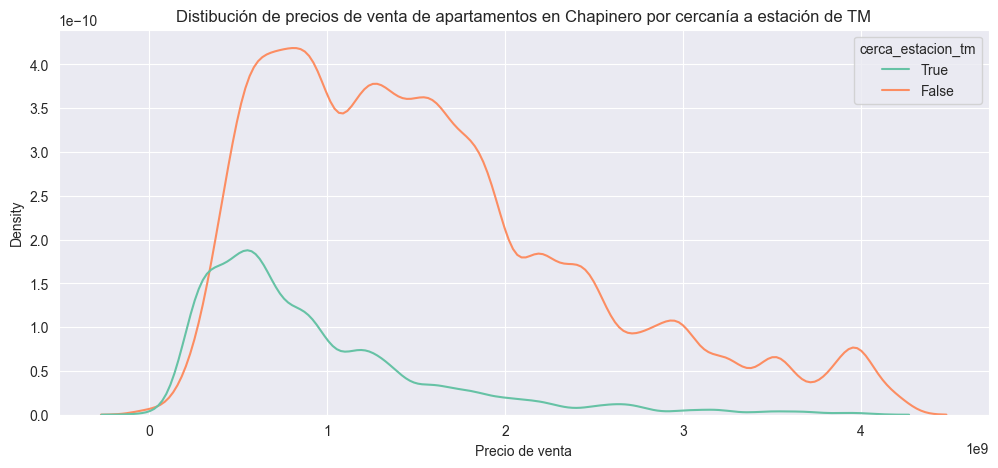

In [50]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.show()

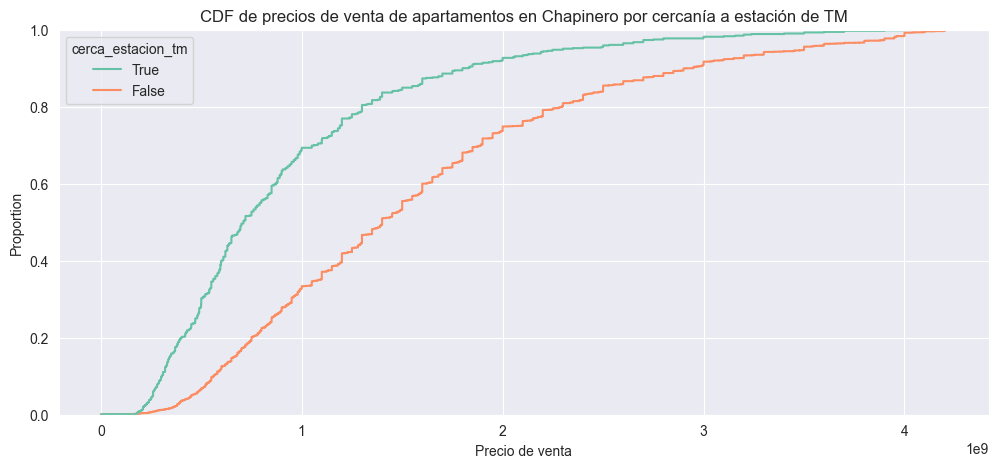

In [51]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.show()

### Estrato

In [53]:
chapinero.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,4,1.2 billion,425.4 million,810.0 million,892.5 million,1.1 billion,1.4 billion,1.8 billion
1.0,2,550.0 million,63.6 million,505.0 million,527.5 million,550.0 million,572.5 million,595.0 million
2.0,5,284.0 million,146.8 million,150.0 million,165.0 million,235.0 million,380.0 million,490.0 million
3.0,91,388.5 million,267.1 million,175.0 million,260.0 million,310.0 million,386.9 million,1.8 billion
4.0,338,603.1 million,465.2 million,160.0 million,365.0 million,488.9 million,649.8 million,4.1 billion
5.0,416,1.0 billion,606.5 million,1.2 million,598.0 million,800.0 million,1.3 billion,4.0 billion
6.0,3.0 thousand,1.6 billion,887.1 million,700.0 thousand,950.0 million,1.5 billion,2.1 billion,4.2 billion


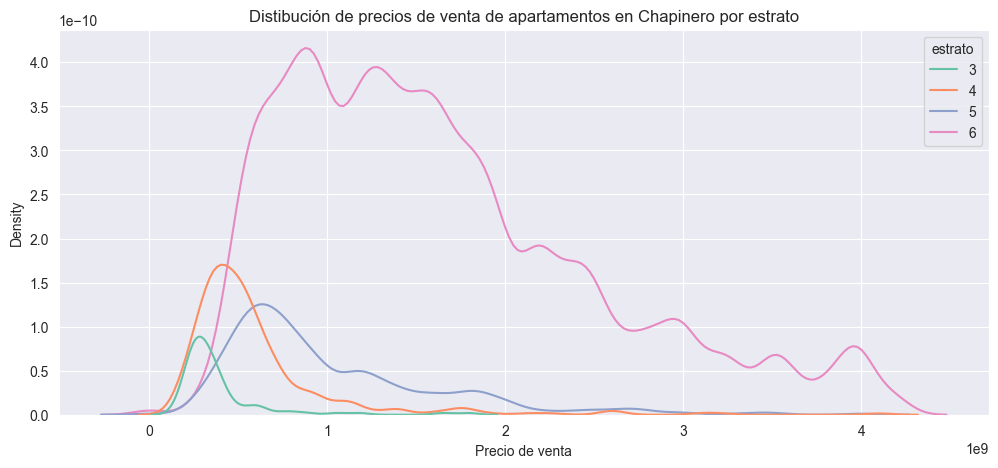

In [55]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.show()

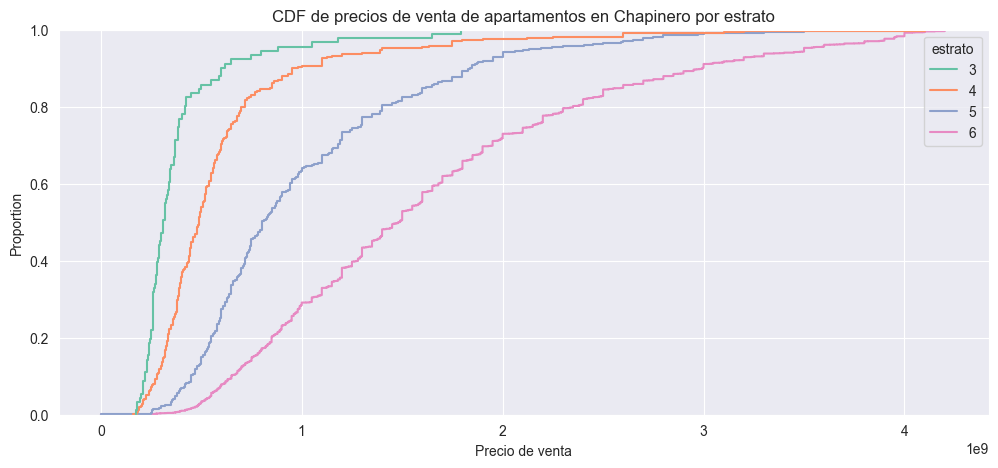

In [56]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.show()

In [59]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'cerca_estacion_tm'],
      dtype='object')

### Antiguedad del apartamento

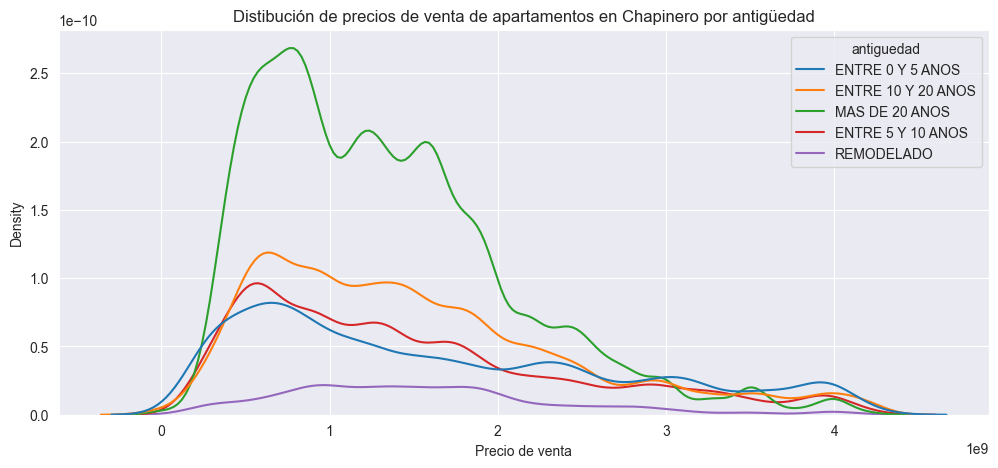

In [64]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='antiguedad',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.show()

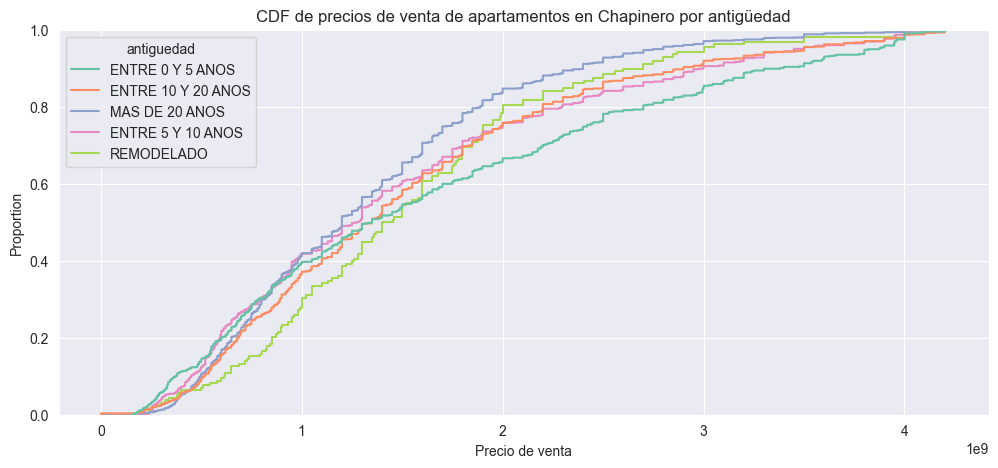

In [65]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.show()

### Estacion de TM Cercana

In [122]:
estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Virrey,160,1.3 billion,791.0 million,180.0 million,653.8 million,1.1 billion,1.9 billion,3.7 billion
Calle 85,147,1.1 billion,554.8 million,370.0 million,623.3 million,900.0 million,1.4 billion,3.5 billion
Calle 100,179,959.8 million,591.0 million,260.0 million,585.0 million,840.0 million,1.1 billion,3.9 billion
Calle 72,11,877.8 million,472.2 million,219.0 million,580.0 million,775.0 million,1.1 billion,1.8 billion
Héroes,12,870.2 million,1.0 billion,2.1 million,525.0 million,565.0 million,815.0 million,4.0 billion
Calle 76,18,654.7 million,362.1 million,300.0 million,520.0 million,599.5 million,695.0 million,2.0 billion
Flores,18,628.5 million,281.6 million,240.0 million,427.5 million,568.0 million,772.5 million,1.4 billion
Calle 63,62,505.6 million,553.7 million,175.0 million,286.8 million,335.0 million,440.0 million,3.2 billion
Calle 45,26,477.4 million,211.6 million,216.0 million,304.2 million,475.0 million,621.2 million,1.1 billion


In [123]:
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False)

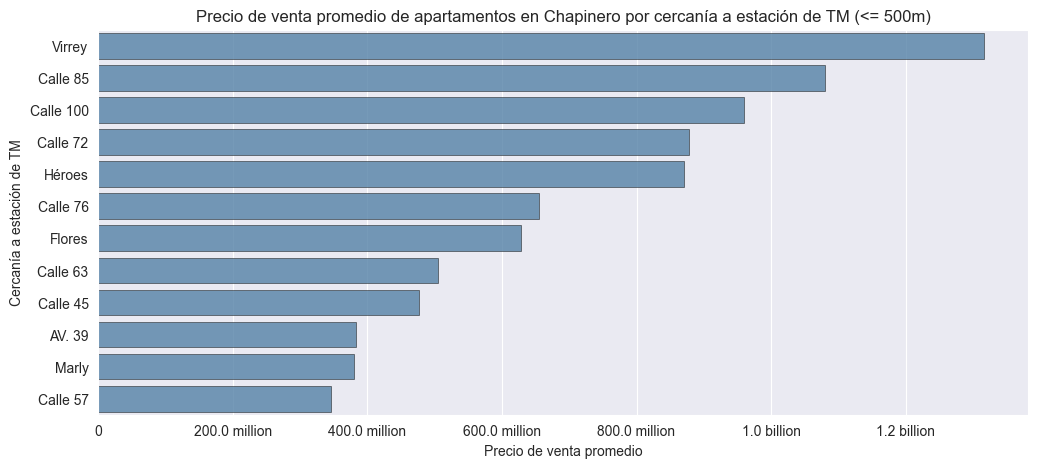

In [124]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Precio de venta promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

## Antiguedad

In [125]:
chapinero.antiguedad.value_counts()

antiguedad
MAS DE 20 ANOS        1589
ENTRE 10 Y 20 ANOS     845
ENTRE 0 Y 5 ANOS       632
ENTRE 5 Y 10 ANOS      624
REMODELADO             158
Name: count, dtype: int64

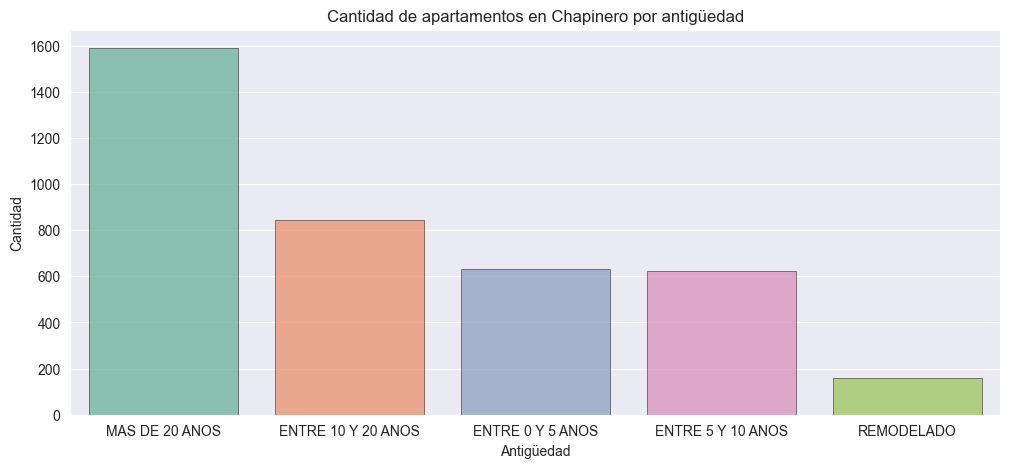

In [129]:
plt.figure(figsize=(12, 5))

sns.countplot(
    chapinero,
    x='antiguedad',
    order=chapinero.antiguedad.value_counts().index,
    palette='Set2',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Cantidad de apartamentos en Chapinero por antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

### Barrios

In [130]:
chapinero.groupby('antiguedad')['barrio'].describe()

,count,unique,top,freq
antiguedad,,,,
ENTRE 0 Y 5 ANOS,632,43,S.C. CHICO NORTE,82
ENTRE 10 Y 20 ANOS,845,54,S.C. CHICO NORTE,130
ENTRE 5 Y 10 ANOS,624,52,S.C. CHICO NORTE,98
MAS DE 20 ANOS,1589,58,S.C. CHICO NORTE,203
REMODELADO,158,34,S.C. BELLAVISTA,24


### Estrato

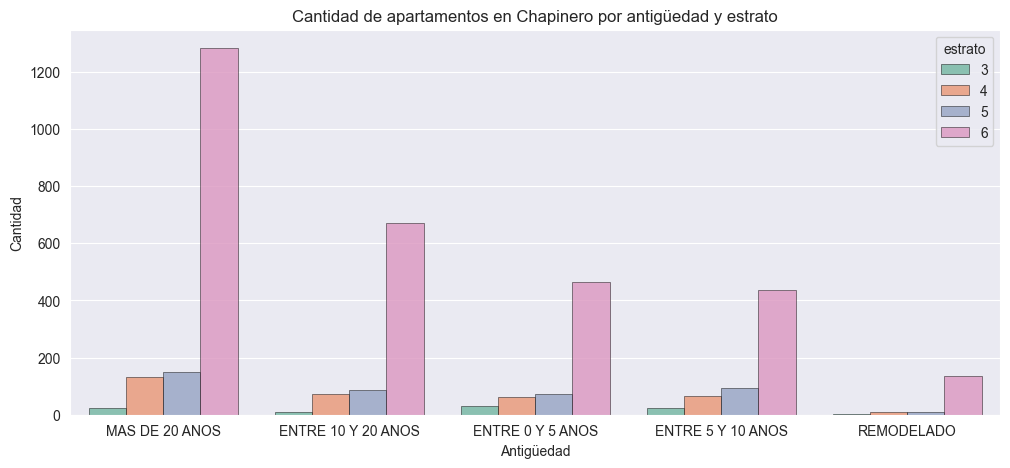

In [137]:
plt.figure(figsize=(12, 5))

sns.countplot(
    chapinero,
    x='antiguedad',
    order=chapinero.antiguedad.value_counts().index,
    palette='Set2',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
    hue='estrato',
    hue_order=[3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos en Chapinero por antigüedad y estrato')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()